<a href="https://colab.research.google.com/github/sidds4474/Online-Retail-Customer-Segmentation---ML/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Online Retail Customer Segmentation.**

## **Problem Description**

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## **Data Description**

### **Attribute Information:**

***InvoiceNo:*** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

***StockCode:*** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

***Description:*** Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.

***InvoiceDate:*** Invice Date and time. Numeric, the day and time when each transaction was generated.

***UnitPrice:*** Unit price. Numeric, Product price per unit in sterling.

***CustomerID:*** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

***Country:*** Country name. Nominal, the name of the country where each customer resides.

In [2]:
#imorting important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)
import warnings
warnings.filterwarnings('ignore')
from numpy import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path='/content/drive/MyDrive/Online Retail Customer Segmentation - Capstone Project/Online Retail.csv'

In [9]:
retail_df=pd.read_csv(file_path,sep=",",encoding="ISO-8859-1")
retail_df.head(-5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/11 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/11 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/11 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/11 12:50,1.95,12680.0,France


In [10]:
# shape of dataset
retail_df.shape

(541909, 8)

# **Data Wrangling**

In [11]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Observations:**

Datatype of InvoiceDate is object need to convert it into datatime.

If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.

There are null values in CustomerID and Description.

In [12]:
# Let's check the null values count.
retail_df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

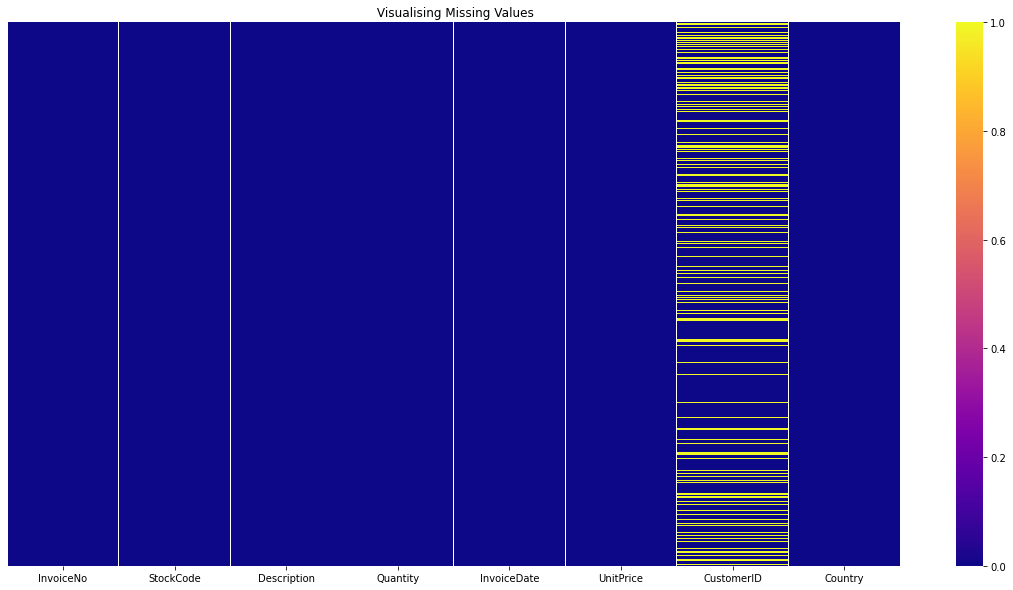

In [14]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(20,10))
sns.heatmap(retail_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")
plt.show()

**Observations:**

We can see missing values in CustomerID and Description columns.

CustomerID is our identification feature so if it is missing that means other features wont help us in data analysis.

Dropping that all missing datapoints

In [15]:
retail_df.dropna(inplace=True)

In [16]:
retail_df.shape

(406829, 8)

After drop we have **8 features** and **406829 datapoints**

In [17]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Here we can see that min value for Quantity column is negative.

UnitPrice has 0 as min value.

Need to Explore these columns.

In [ ]:
# We have negative valiues in quantity.
# Here we observed that Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop this entries.
retail_df[retail_df['Quantity']<0]